# **Modelo de Aprendizaje Automático No Supervisado: Detección de Anomalías**

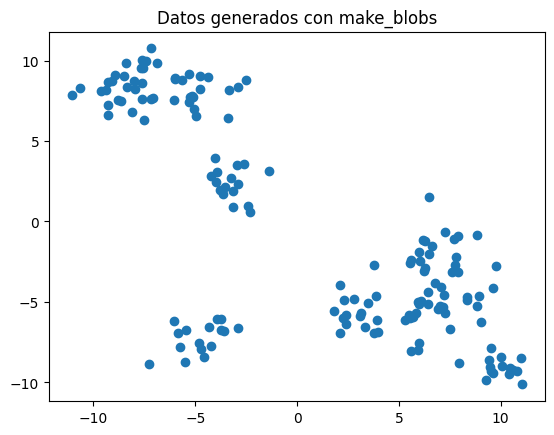

Tamaño del conjunto de entrenamiento: (109, 2)
Tamaño del conjunto de prueba: (24, 2)
Tamaño del conjunto de validación: (24, 2)


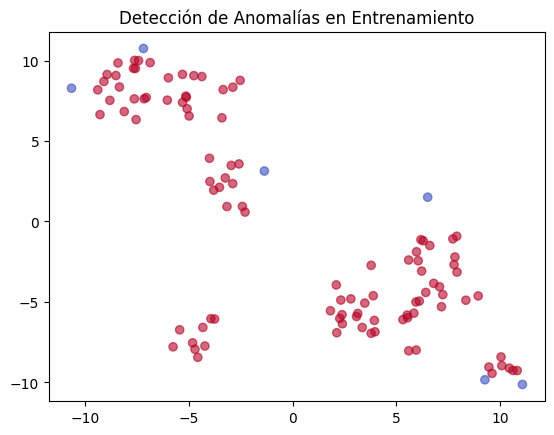

Número de anomalías detectadas en validación: 1


In [1]:
#---------------------------------------------------------------------------------
# Paso 1: Importación de Bibliotecas
#---------------------------------------------------------------------------------
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble         import IsolationForest
from sklearn.datasets         import make_blobs
from sklearn.preprocessing    import StandardScaler
from sklearn.model_selection  import train_test_split

#---------------------------------------------------------------------------------
# Paso 2: Generación del Conjunto de Datos
#---------------------------------------------------------------------------------
random.seed( 42 )
centros = random.randint( 5, 10 )
X, _ = make_blobs( n_samples = random.randint( 100, 500 ), centers = centros )

plt.scatter( X[:, 0], X[:, 1] )
plt.title( "Datos generados con make_blobs" )
plt.show()

#---------------------------------------------------------------------------------
# Paso 3: División del Conjunto de Datos en Entrenamiento (70%), Prueba (15%) y Validación (15%)
#---------------------------------------------------------------------------------
X_train, X_temp = train_test_split( X,      test_size = 0.3, random_state = 42 )
X_test,  X_val  = train_test_split( X_temp, test_size = 0.5, random_state = 42 )

print( f"Tamaño del conjunto de entrenamiento: {X_train.shape}" )
print( f"Tamaño del conjunto de prueba: {X_test.shape}" )
print( f"Tamaño del conjunto de validación: {X_val.shape}" )

#---------------------------------------------------------------------------------
# Paso 4: Escalado de los Datos
#
# Normalizamos los datos para mejorar el rendimiento del algoritmo.
#---------------------------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform( X_train )
X_test_scaled  = scaler.transform(     X_test  )
X_val_scaled   = scaler.transform(     X_val   )

#---------------------------------------------------------------------------------
# Paso 5: Entrenamiento del Modelo de Detección de Anomalías
#---------------------------------------------------------------------------------
#   Isolation Forest es un algoritmo eficiente para la detección de anomalías
#     * contamination:  porcentaje de datos que se consideran anómalos (e.g., 5% -> 0.05)
#     * n_estimators:   número de árboles en el bosque
#     * max_samples:    cantidad de muestras usadas en cada árbol (si es "auto", usa todas)
#     * random_state:   semilla para reproducibilidad
#---------------------------------------------------------------------------------
contamination_rate = 0.05  # 5% de los datos se consideran anómalos
model = IsolationForest( contamination = contamination_rate, n_estimators = 100, random_state = 42 )
model.fit( X_train_scaled )

#---------------------------------------------------------------------------------
# Paso 6: Predicción y Detección de Anomalías
#---------------------------------------------------------------------------------
# El modelo devuelve:
#   * 1  -> normal
#   * -1 -> anomalía
#---------------------------------------------------------------------------------
y_train_pred = model.predict( X_train_scaled )
y_val_pred   = model.predict( X_val_scaled   )

#---------------------------------------------------------------------------------
# Paso 7: Visualización de las Anomalías en el Conjunto de Entrenamiento
#---------------------------------------------------------------------------------
plt.scatter( X_train[:, 0], X_train[:, 1], c = y_train_pred, cmap = "coolwarm", alpha = 0.6 )
plt.title( "Detección de Anomalías en Entrenamiento" )
plt.show()

#---------------------------------------------------------------------------------
# Paso 8: Evaluación en el Conjunto de Validación
#---------------------------------------------------------------------------------
n_anomalies = sum( y_val_pred == -1 )
print( f"Número de anomalías detectadas en validación: {n_anomalies}" )


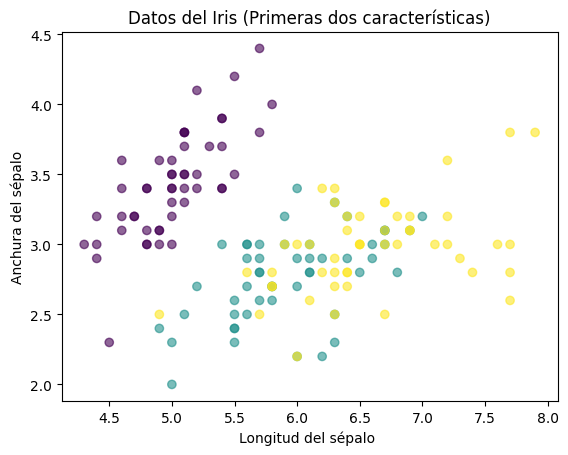

Tamaño del conjunto de entrenamiento: (105, 4)
Tamaño del conjunto de prueba: (22, 4)
Tamaño del conjunto de validación: (23, 4)


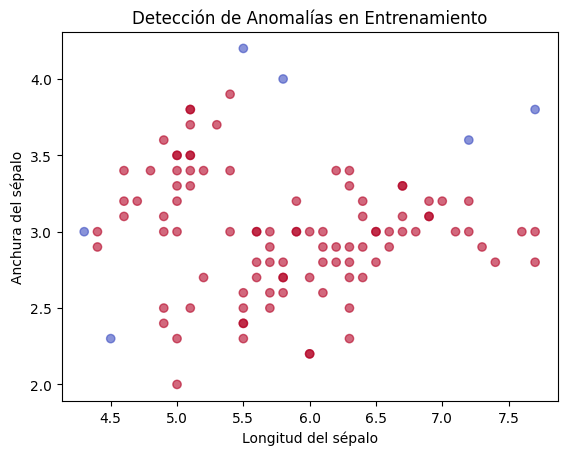

Número de anomalías detectadas en validación: 2


In [2]:
#---------------------------------------------------------------------------------
# Paso 1: Importación de Bibliotecas
#---------------------------------------------------------------------------------
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#---------------------------------------------------------------------------------
# Paso 2: Cargar el dataset Iris
#---------------------------------------------------------------------------------
iris = load_iris()
X = iris.data     # Características (features) del conjunto de datos Iris
y = iris.target   # Etiquetas (aunque no las usaremos, ya que es aprendizaje no supervisado)

# Visualizamos los datos (solo las dos primeras características para facilitar la visualización)
plt.scatter( X[:, 0], X[:, 1], c = y, cmap = 'viridis', alpha = 0.6 )
plt.title( "Datos del Iris (Primeras dos características)" )
plt.xlabel( "Longitud del sépalo ")
plt.ylabel( "Anchura del sépalo" )
plt.show()

#---------------------------------------------------------------------------------
# Paso 3: División del Conjunto de Datos en Entrenamiento (70%), Prueba (15%) y Validación (15%)
#---------------------------------------------------------------------------------
X_train, X_temp = train_test_split( X,      test_size = 0.3, random_state = 42 )
X_test,  X_val  = train_test_split( X_temp, test_size = 0.5, random_state = 42 )

print( f"Tamaño del conjunto de entrenamiento: {X_train.shape}" )
print( f"Tamaño del conjunto de prueba: {X_test.shape}" )
print( f"Tamaño del conjunto de validación: {X_val.shape}" )

#---------------------------------------------------------------------------------
# Paso 4: Escalado de los Datos
#
# Normalizamos los datos para mejorar el rendimiento del algoritmo.
#---------------------------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform( X_train )
X_test_scaled  = scaler.transform(     X_test  )
X_val_scaled   = scaler.transform(     X_val   )

#---------------------------------------------------------------------------------
# Paso 5: Entrenamiento del Modelo de Detección de Anomalías
#
#   Isolation Forest es un algoritmo eficiente para la detección de anomalías
#     * contamination:  porcentaje de datos que se consideran anómalos (e.g., 5% -> 0.05)
#     * n_estimators:   número de árboles en el bosque
#     * max_samples:    cantidad de muestras usadas en cada árbol (si es "auto", usa todas)
#     * random_state:   semilla para reproducibilidad
#---------------------------------------------------------------------------------
contamination_rate = 0.05  # 5% de los datos se consideran anómalos
model = IsolationForest( contamination = contamination_rate, n_estimators = 100, random_state = 42 )
model.fit( X_train_scaled )

#---------------------------------------------------------------------------------
# Paso 6: Predicción y Detección de Anomalías
#
# El modelo devuelve:
#   * 1  -> normal
#   * -1 -> anomalía
#---------------------------------------------------------------------------------
y_train_pred = model.predict( X_train_scaled )
y_val_pred   = model.predict( X_val_scaled   )

#---------------------------------------------------------------------------------
# Paso 7: Visualización de las Anomalías en el Conjunto de Entrenamiento
#---------------------------------------------------------------------------------
plt.scatter( X_train[:, 0], X_train[:, 1], c = y_train_pred, cmap = "coolwarm", alpha = 0.6 )
plt.title( "Detección de Anomalías en Entrenamiento")
plt.xlabel( "Longitud del sépalo")
plt.ylabel( "Anchura del sépalo")
plt.show()

#---------------------------------------------------------------------------------
# Paso 8: Evaluación en el Conjunto de Validación
#
# Evaluamos cuántas anomalías han sido detectadas en el conjunto de validación
#---------------------------------------------------------------------------------
n_anomalies = sum( y_val_pred == -1 )
print( f"Número de anomalías detectadas en validación: {n_anomalies}" )
